In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

def uniform(x):
    y = np.ones(len(x))/len(x)

    return y

def cosine(x,peaks,scale,bias):
    y = scale*np.cos(np.pi+ 2*np.pi*x*peaks/(len(x)))+bias
    y /= y.sum()

    return y

def exp(x):
    y = np.exp(x*2/(len(x)))
    y /= y.sum()

    return y

def chicargo(x):
    x = np.linspace(0,3,int(len(x)/2))
    y = np.exp(x)
    y = np.append(y,y[::-1])
    y /= y.sum()
    return y

def make_feh_profile(total_duration_minutes, peak_mm_accum, peak_before_frac=0.5):
    a_sum=0.1
    b_sum=0.815
    peak_mid_time = total_duration_minutes/2
    
    peak_accum_curve_mm=np.zeros(total_duration_minutes+1)
    for time in range(total_duration_minutes+1):
        # calculate the actual time of the shifted peak
        peak_after_frac=1-peak_before_frac
        shifted_peak_time=peak_mid_time+(peak_before_frac-0.5)*total_duration_minutes
        duration_before_peak=peak_before_frac*total_duration_minutes
        duration_after_peak=peak_after_frac*total_duration_minutes
        # also calculate normalised fraction
        if(time<shifted_peak_time):
            n_time=(time-shifted_peak_time)/duration_before_peak
        else:
            n_time=(time-shifted_peak_time)/duration_after_peak

        if(n_time<-1.0):
            peak_accum_curve_mm[time]=0.0
        elif(n_time<0.0):
            peak_accum_curve_mm[time]=peak_mm_accum*(peak_before_frac-peak_before_frac*(1-a_sum**((np.abs(n_time))**b_sum))/(1-a_sum))
        elif(n_time<=1.0):
            peak_accum_curve_mm[time]=peak_mm_accum*(peak_before_frac+peak_after_frac*(1-a_sum**((np.abs(n_time))**b_sum))/(1-a_sum))
        elif(n_time>1.0):
            peak_accum_curve_mm[time]=peak_mm_accum
        else:
            raise Exception('Problem getting the peak shape right')
    
    
    rate_mm_hr =(peak_accum_curve_mm[1:]-peak_accum_curve_mm[:-1])*60
    rate_mm_min = rate_mm_hr/60
    
    return peak_accum_curve_mm, rate_mm_hr, rate_mm_min


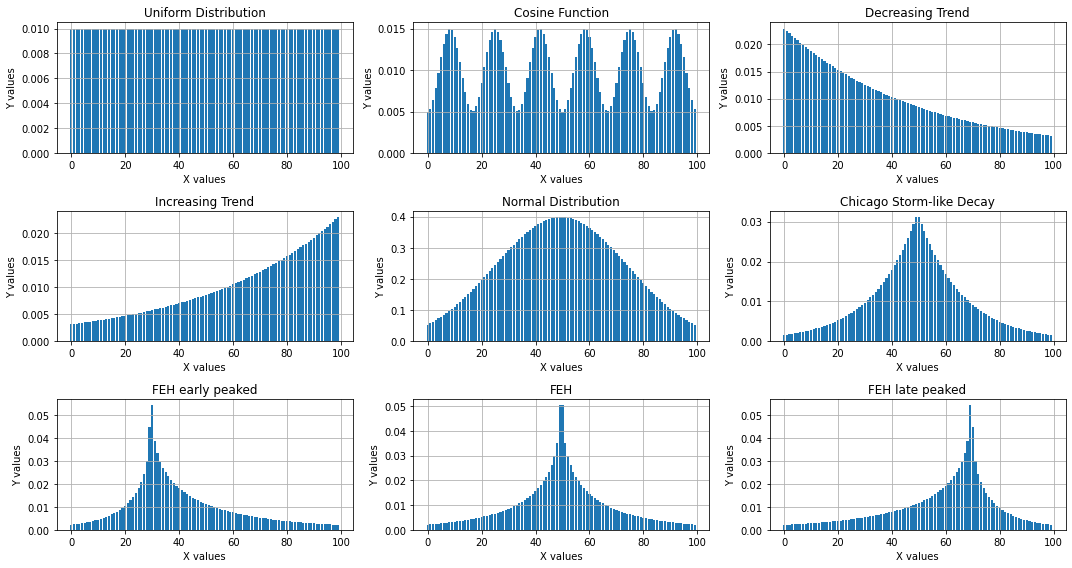

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

def uniform(x):
    y = np.ones(len(x))/len(x)

    return y

def cosine(x,peaks,scale,bias):
    y = scale*np.cos(np.pi+ 2*np.pi*x*peaks/(len(x)))+bias
    y /= y.sum()

    return y

def exp(x):
    y = np.exp(x*2/(len(x)))
    y /= y.sum()

    return y

def chicargo(x):
    x = np.linspace(0,3,int(len(x)/2))
    y = np.exp(x)
    y = np.append(y,y[::-1])
    y /= y.sum()
    return y

def make_feh_profile(total_duration_minutes, peak_mm_accum, peak_before_frac=0.5):
    a_sum=0.1
    b_sum=0.815
    peak_mid_time = total_duration_minutes/2
    
    peak_accum_curve_mm=np.zeros(total_duration_minutes+1)
    for time in range(total_duration_minutes+1):
        # calculate the actual time of the shifted peak
        peak_after_frac=1-peak_before_frac
        shifted_peak_time=peak_mid_time+(peak_before_frac-0.5)*total_duration_minutes
        duration_before_peak=peak_before_frac*total_duration_minutes
        duration_after_peak=peak_after_frac*total_duration_minutes
        # also calculate normalised fraction
        if(time<shifted_peak_time):
            n_time=(time-shifted_peak_time)/duration_before_peak
        else:
            n_time=(time-shifted_peak_time)/duration_after_peak

        if(n_time<-1.0):
            peak_accum_curve_mm[time]=0.0
        elif(n_time<0.0):
            peak_accum_curve_mm[time]=peak_mm_accum*(peak_before_frac-peak_before_frac*(1-a_sum**((np.abs(n_time))**b_sum))/(1-a_sum))
        elif(n_time<=1.0):
            peak_accum_curve_mm[time]=peak_mm_accum*(peak_before_frac+peak_after_frac*(1-a_sum**((np.abs(n_time))**b_sum))/(1-a_sum))
        elif(n_time>1.0):
            peak_accum_curve_mm[time]=peak_mm_accum
        else:
            raise Exception('Problem getting the peak shape right')
    
    
    rate_mm_hr =(peak_accum_curve_mm[1:]-peak_accum_curve_mm[:-1])*60
    rate_mm_min = rate_mm_hr/60
    
    return peak_accum_curve_mm, rate_mm_hr, rate_mm_min

x_values = np.array([np.float32(i) for i in range(100)])
y_values_uni = uniform(x_values)
y_values_cos = cosine(x_values,6,2,4)
y_values_increase = exp(x_values)
y_values_decrease = y_values_increase[::-1]
y_values_norm = norm().pdf(np.linspace(-2,2,len(x_values)))
y_values_chicargo = chicargo(x_values)
y_values_feh_shift_early = make_feh_profile(total_duration_minutes = 100, peak_mm_accum =1,  peak_before_frac = 0.3)[2]
y_values_feh = make_feh_profile(total_duration_minutes= 100, peak_mm_accum =1,  peak_before_frac=0.5)[2]
y_values_feh_shift_late = make_feh_profile(total_duration_minutes= 100, peak_mm_accum = 1,  peak_before_frac=0.7)[2]

# Create subplots (2 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(15, 8))

# Titles for each subplot
titles = ["Uniform Distribution", "Cosine Function", "Decreasing Trend", 
          "Increasing Trend", "Normal Distribution", "Chicago Storm-like Decay", 
          'FEH early peaked', 'FEH', 'FEH late peaked']

# y-values for each plot
y_values_list = [y_values_uni, y_values_cos, y_values_decrease, 
                 y_values_increase, y_values_norm, y_values_chicargo,
                 y_values_feh_shift_early, y_values_feh, y_values_feh_shift_late]

# Plot each bar chart in its respective subplot
for i, ax in enumerate(axes.flat):
    ax.bar(x_values, y_values_list[i])
    ax.set_title(titles[i])
    ax.set_xlabel("X values")
    ax.set_ylabel("Y values")
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()